 # REGRESSION MODEL - PREDICTING PRICE OF PRE OWNED CARS
 ### @author: Samyak

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Setting graph size

In [3]:
sns.set(rc = {"figure.figsize": (10, 8)})

### Reading Data and getting info about data

In [4]:
data_price = pd.read_csv("cars_sampled.csv")
cars = data_price.copy()
cars.info()
cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [5]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [6]:
# To set float values upto 3 decimal places
pd.set_option("display.float_format", lambda x: "%.3f" % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


### Dropping unwanted columns

In [7]:
cols = ["name", "dateCrawled", "dateCreated", "postalCode", "lastSeen"]
cars = cars.drop(columns = cols, axis =1)

### Removing duplicates from the data

In [8]:
cars.drop_duplicates(keep="first", inplace=True)

In [9]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

## Varialbe Analysis
### 1.Year Of Registration

In [10]:
yearwise = cars["yearOfRegistration"].value_counts().sort_index()
print(cars["yearOfRegistration"].describe())
print("yearOfRegistration Greater than 2018:", sum(cars["yearOfRegistration"] > 2018))
print("yearOfRegistration Lesser than 2018:",  sum(cars["yearOfRegistration"] < 1950))

count   49531.000
mean     2005.560
std       123.572
min      1000.000
25%      1999.000
50%      2003.000
75%      2008.000
max      9999.000
Name: yearOfRegistration, dtype: float64
yearOfRegistration Greater than 2018: 26
yearOfRegistration Lesser than 2018: 38


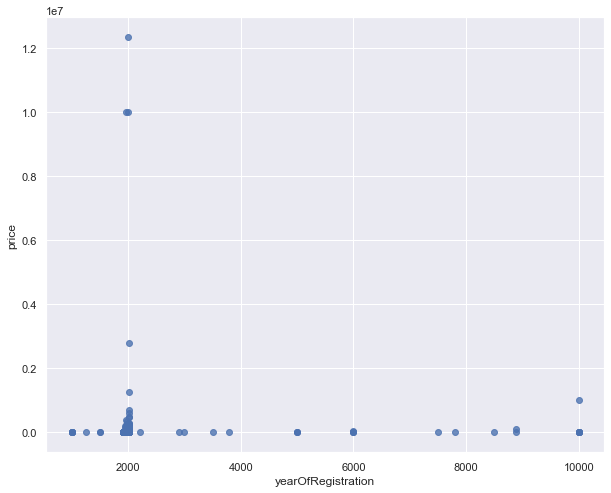

In [11]:
sns.regplot(x="yearOfRegistration", y="price", scatter=True, fit_reg=False, data=cars)

As we can see that the data is compact at one point i.e. not clearly scattered due many off range values.

#### Removing Null values

In [12]:
cars = cars.dropna(axis = 0)
cars.isnull().sum()

seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

### 2. Varialbe price

Price Greater than 150000: 20
Price Lesser than 100: 507


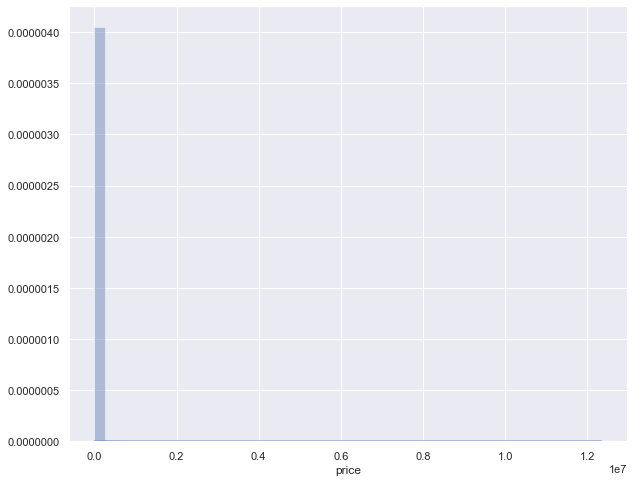

In [13]:
price_count = cars["price"].value_counts().sort_index()
cars["price"].describe()
print("Price Greater than 150000:",sum(cars["price"] > 150000))
print("Price Lesser than 100:",sum(cars["price"] < 100))
sns.distplot(cars["price"])

Here also we can see that the data is compact at one point i.e. not clearly scattered due many off range values.

### 3.Varialbe PowerPS

In [14]:
power_count = cars["powerPS"].value_counts().sort_index()
cars["powerPS"].describe()
print("powerPS greater than: ",sum(cars["powerPS"] > 500))
print("powerPS smaller than: ",sum(cars["powerPS"] < 10))

powerPS greater than:  72
powerPS smaller than:  1330


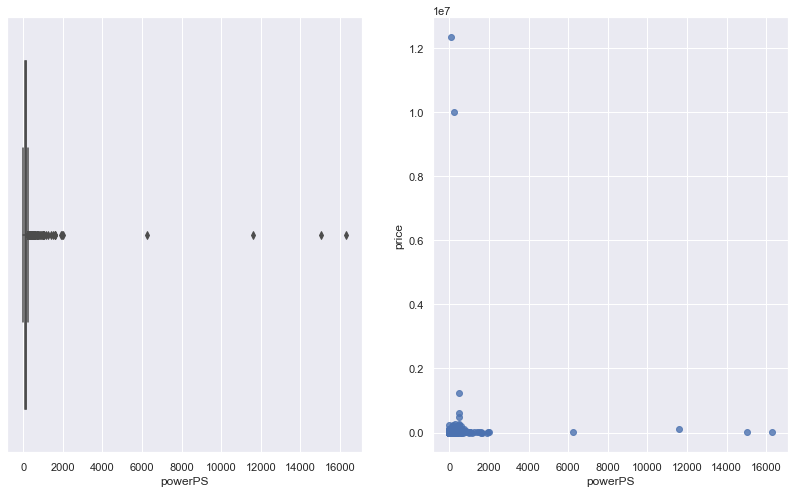

In [15]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.boxplot(cars["powerPS"], ax=axis1)
sns.regplot(x="powerPS", y="price", scatter=True, fit_reg=False, data=cars, ax=axis2)

Same case with this also,
we can see that the data is compact at one point i.e. not clearly scattered due many or large number of off range values.

## Ranging the data to make it more usefull

In [16]:
cars = cars[
    (cars.yearOfRegistration >= 1950)
    & (cars.yearOfRegistration <= 2018)
    & (cars.price <= 150000)
    & (cars.price >= 100)
    & (cars.powerPS <= 500)
    & (cars.powerPS >= 10)
]

In [17]:
cars["monthOfRegistration"] /= 12

#### Adding Age

In [18]:
cars["Age"] = (2018-cars["yearOfRegistration"])+cars["monthOfRegistration"]
cars["Age"] = round(cars["Age"], 2)
cars["Age"].describe()

count   32884.000
mean       15.020
std         6.279
min         0.420
25%        10.500
50%        14.670
75%        18.920
max        67.500
Name: Age, dtype: float64

In [19]:
#Since age is deployed therefor removing
cols1 = ["yearOfRegistration", "monthOfRegistration"]
cars = cars.drop(columns = cols1, axis = 1)
cars1 = cars.copy()
cars1.head()

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
5,private,offer,988,test,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.170
7,private,offer,1399,test,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.920


### Vissualizing Parameters after narrowing the range form dataframe
### 4. Variable Age


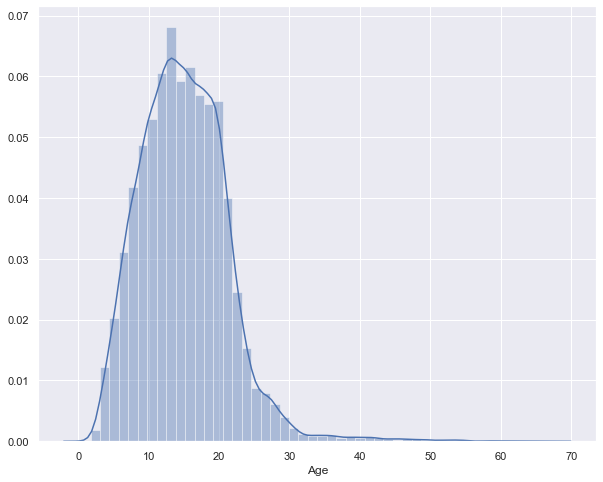

In [20]:
# Age
sns.distplot(cars["Age"])

### 5. Variable Price (Output variable)

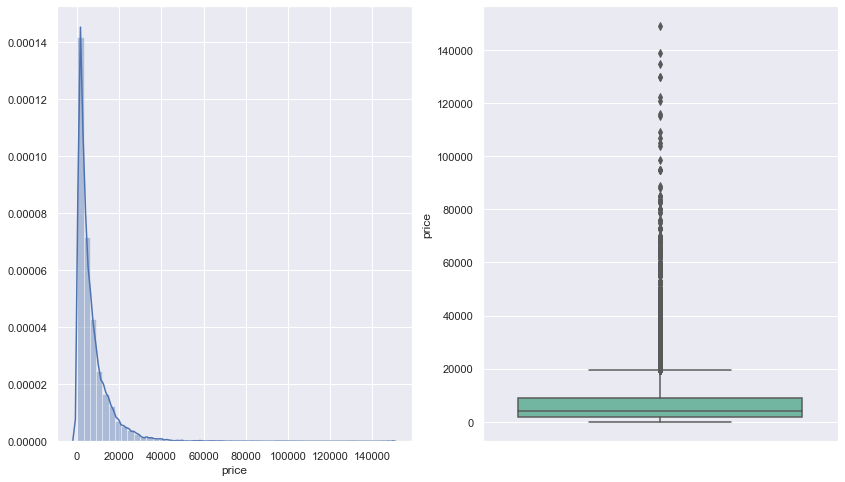

In [22]:
# Price
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.distplot(cars["price"], ax=axis1)
sns.boxplot(y=cars["price"], ax=axis2, palette="Set2")

Text(0.5, 1.0, 'ScatterPlot: Price vs Age')

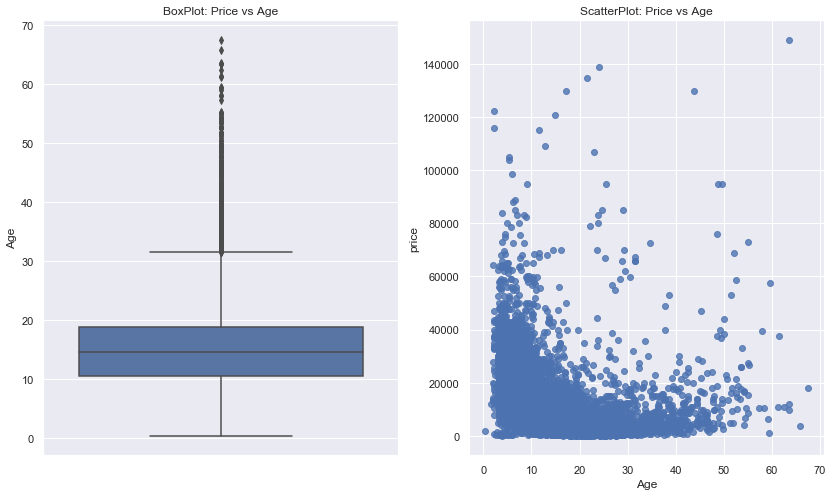

In [23]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.boxplot(y=cars["Age"], ax=axis1)
axis1.set_title("BoxPlot: Price vs Age")

sns.regplot(x="Age", y="price", scatter=True, fit_reg=False, data=cars1, ax=axis2)
axis2.set_title("ScatterPlot: Price vs Age")

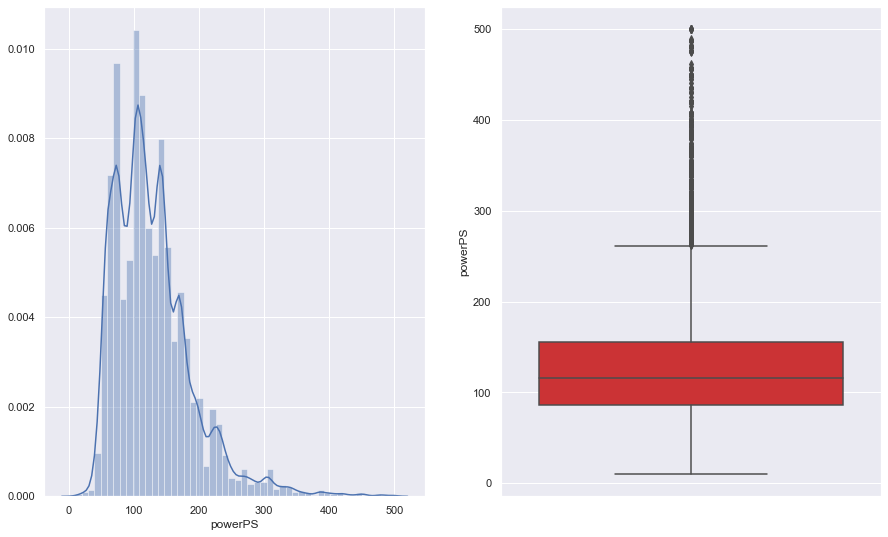

In [24]:
# PowerPS
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(15,9))

sns.distplot(cars["powerPS"], ax=axis1)
sns.boxplot(y=cars["powerPS"], ax=axis2, palette="Set1")

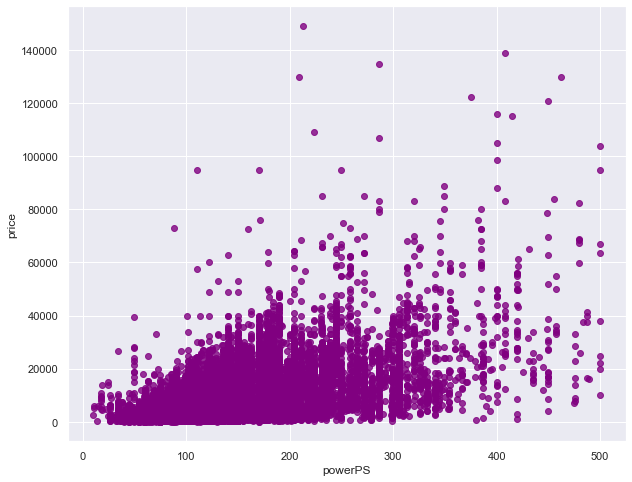

In [25]:
sns.regplot(x="powerPS", y="price", scatter=True, fit_reg=False, data=cars1, scatter_kws={"color": "purple"})

## Comparing and Analyzing each and every varaible with price
### And removing Insignificant columns

private       32883
commercial        1
Name: seller, dtype: int64
col_0       count
seller           
commercial  0.000
private     1.000


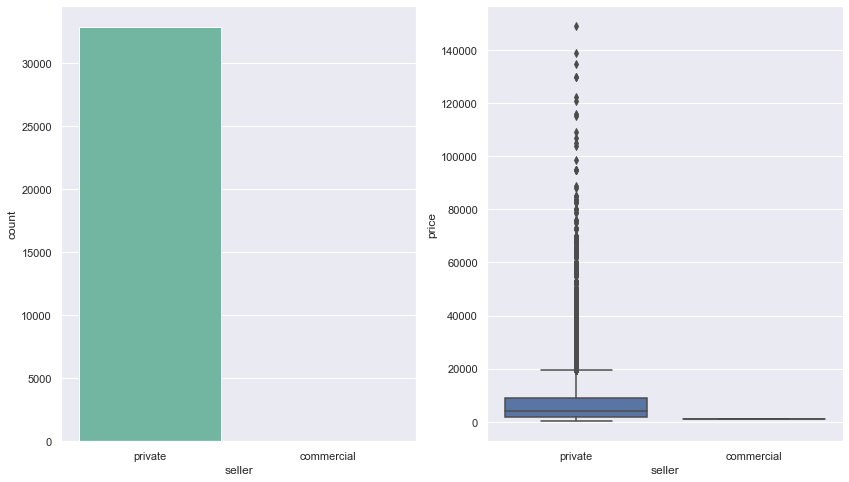

In [26]:
#Seller
print(cars["seller"].value_counts())
print(pd.crosstab(cars["seller"], columns="count", normalize=True))

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.countplot(x="seller", data=cars1, ax=axis1, palette="Set2")
sns.boxplot(x="seller", y="price", data=cars1, ax=axis2)
#Fewer cars have commercial which is innsignificant
#does not affect price as seen in boxplot
cars1 = cars1.drop(columns=["seller"], axis=1)

offer    32884
Name: offerType, dtype: int64
col_0      count
offerType       
offer      1.000


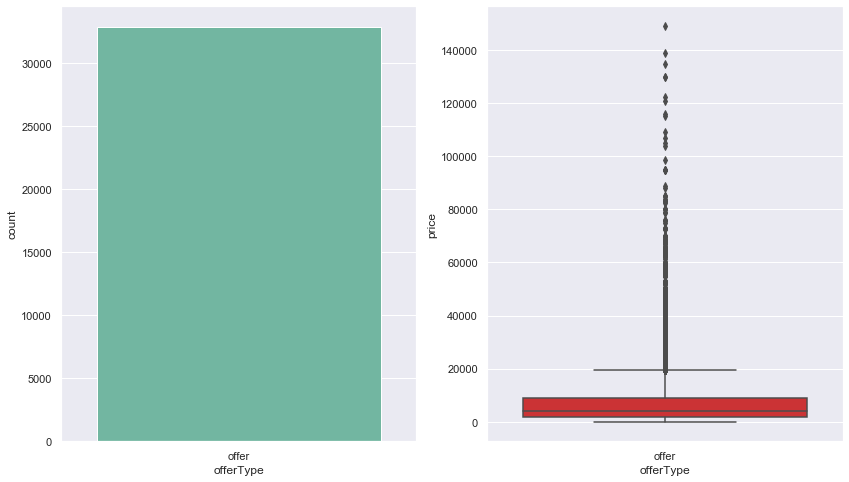

In [27]:
# Offertype
print(cars["offerType"].value_counts())
print(pd.crosstab(cars["offerType"], columns="count", normalize=True))

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.countplot(x="offerType", data=cars1, ax=axis1, palette="Set2")
sns.boxplot(x="offerType", y="price", data=cars1, ax=axis2, palette="Set1")
#does not affect price as seen in boxplot
cars1 = cars1.drop(columns=["offerType"], axis=1)

test       17010
control    15874
Name: abtest, dtype: int64
col_0    count
abtest        
control  0.483
test     0.517


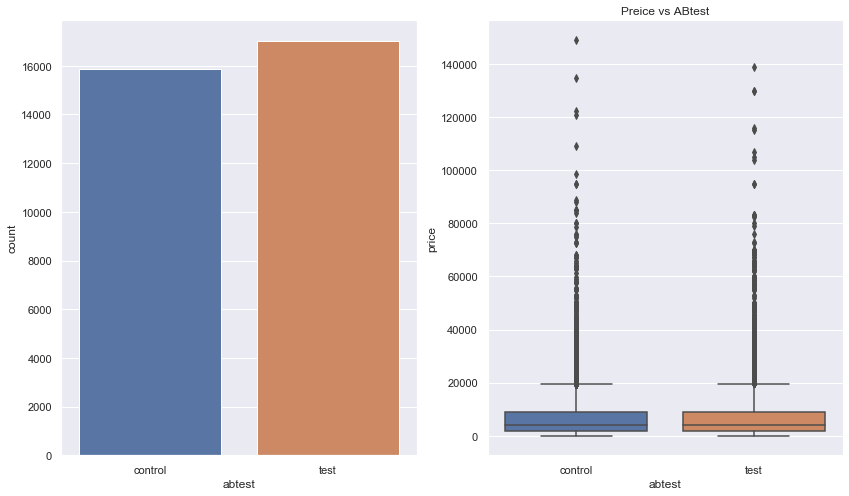

In [28]:
# ABtest
print(cars["abtest"].value_counts())
print(pd.crosstab(cars["abtest"], columns="count", normalize=True))

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.countplot(x="abtest", data=cars1, ax=axis1)
sns.boxplot(x="abtest", y="price", data=cars1, ax=axis2)
axis2.set_title("Preice vs ABtest")

#does not affect price as seen in boxplot
cars1 = cars1.drop(columns=["abtest"], axis=1)

limousine        9795
small car        7367
station wagon    6703
bus              3117
cabrio           2331
coupe            1848
suv              1524
others            199
Name: vehicleType, dtype: int64
col_0          count
vehicleType         
bus            0.095
cabrio         0.071
coupe          0.056
limousine      0.298
others         0.006
small car      0.224
station wagon  0.204
suv            0.046


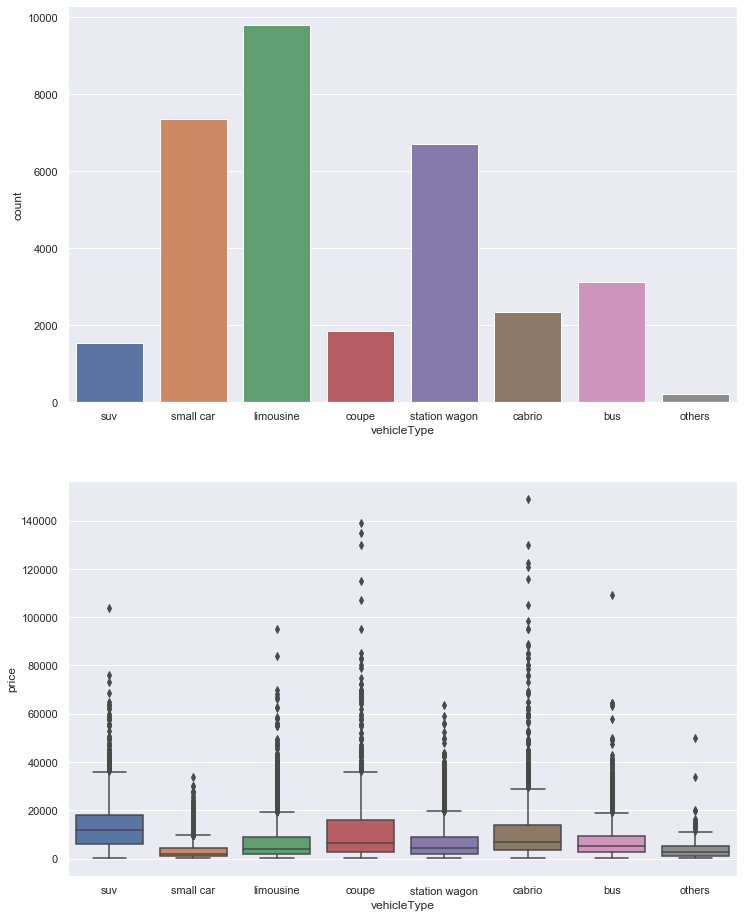

In [29]:
# VehicleType
print(cars["vehicleType"].value_counts())
print(pd.crosstab(cars["vehicleType"], columns="count", normalize=True))

fig, (axis1, axis2) = plt.subplots(2,1,figsize=(12,16))

sns.countplot(x="vehicleType", data=cars1, ax=axis1)
sns.boxplot(x="vehicleType", y="price", data=cars1, ax=axis2)
#affecting the price

manual       25186
automatic     7698
Name: gearbox, dtype: int64
col_0      count
gearbox         
automatic  0.234
manual     0.766


Text(0.5, 1.0, 'Price vs gearbox')

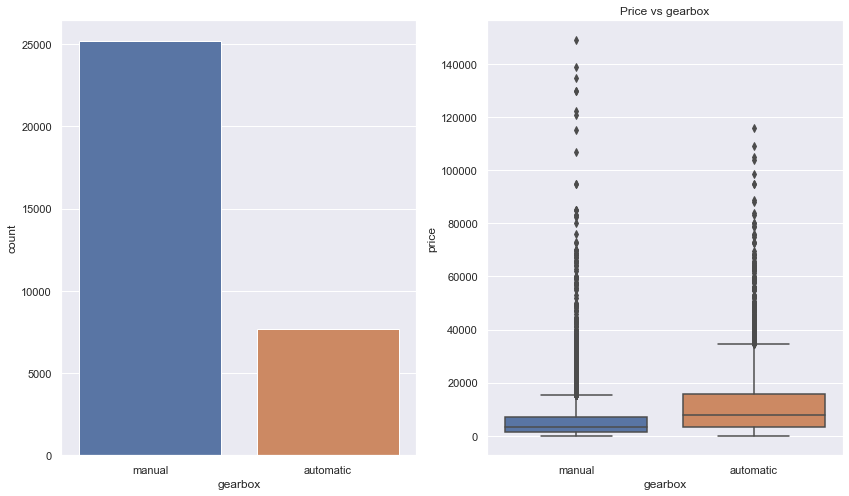

In [30]:
#gearbox
print(cars["gearbox"].value_counts())
print(pd.crosstab(cars["gearbox"], columns="count", normalize=True))

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.countplot(x="gearbox", data=cars1, ax=axis1)
sns.boxplot(x="gearbox", y="price", data=cars1, ax=axis2)
axis2.set_title("Price vs gearbox")#affecting the price

In [31]:
#Model of car
print(cars["model"].value_counts())
print(pd.crosstab(cars["model"], columns="count", normalize=True))
#affecting the price

golf       2611
others     2408
3er        2000
polo       1100
corsa      1018
           ... 
9000          1
b_max         1
charade       1
serie_3       1
200           1
Name: model, Length: 245, dtype: int64
col_0    count
model         
100      0.001
147      0.001
156      0.002
159      0.000
1_reihe  0.003
...        ...
yaris    0.004
yeti     0.001
ypsilon  0.001
z_reihe  0.004
zafira   0.008

[245 rows x 1 columns]


150000    20269
125000     3664
100000     1474
90000      1250
80000      1154
70000       989
60000       980
50000       808
40000       692
30000       606
20000       551
5000        259
10000       188
Name: kilometer, dtype: int64
col_0      count
kilometer       
5000       0.008
10000      0.006
20000      0.017
30000      0.018
40000      0.021
50000      0.025
60000      0.030
70000      0.030
80000      0.035
90000      0.038
100000     0.045
125000     0.111
150000     0.616


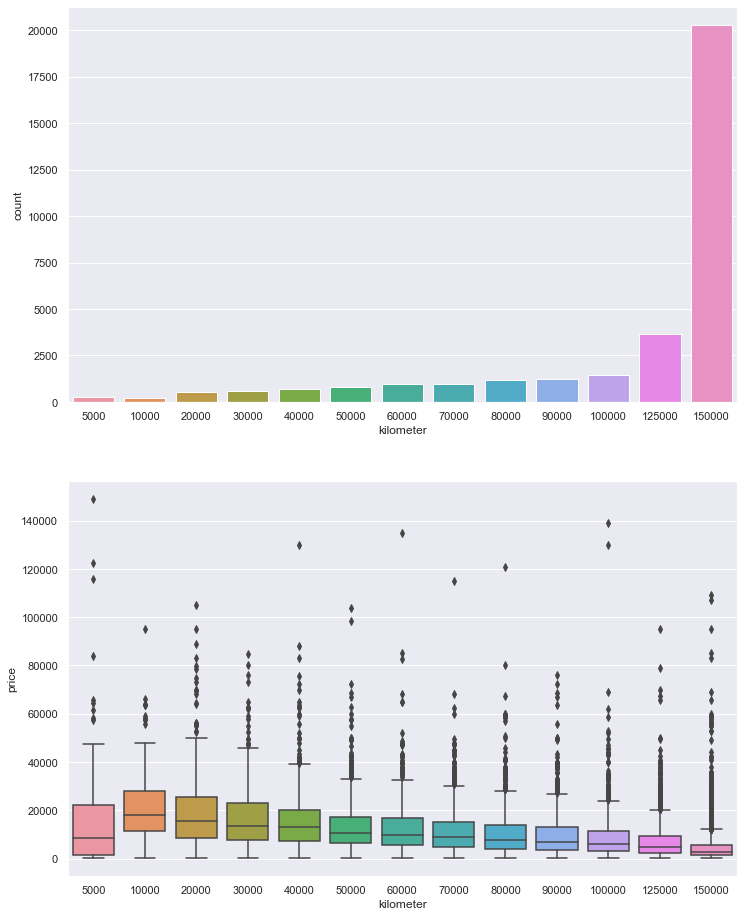

In [32]:
# kilometer
print(cars["kilometer"].value_counts())
print(pd.crosstab(cars["kilometer"], columns="count", normalize=True))

fig, (axis1, axis2) = plt.subplots(2,1,figsize=(12,16))

sns.countplot(x="kilometer", data=cars1, ax=axis1)
sns.boxplot(x="kilometer", y="price", data=cars1, ax=axis2)
#affecting the price

petrol     21304
diesel     10959
lpg          518
cng           60
hybrid        31
electro        8
other          4
Name: fuelType, dtype: int64
col_0     count
fuelType       
cng       0.002
diesel    0.333
electro   0.000
hybrid    0.001
lpg       0.016
other     0.000
petrol    0.648


Text(0.5, 1.0, 'Price vs fuelType')

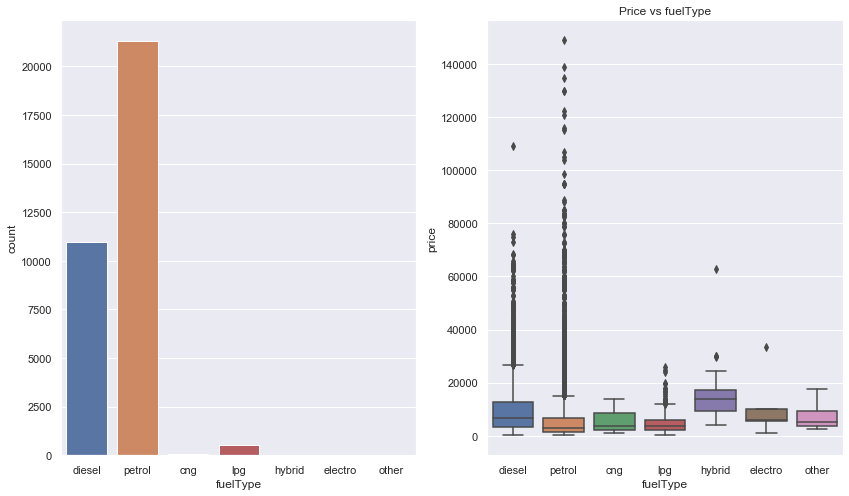

In [33]:
#fuelType
print(cars["fuelType"].value_counts())
print(pd.crosstab(cars["fuelType"], columns="count", normalize=True))

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.countplot(x="fuelType", data=cars1, ax=axis1)
sns.boxplot(x="fuelType", y="price", data=cars1, ax=axis2)
axis2.set_title("Price vs fuelType")
#affecting the price

Text(0.5, 1.0, 'Brand vs Price')

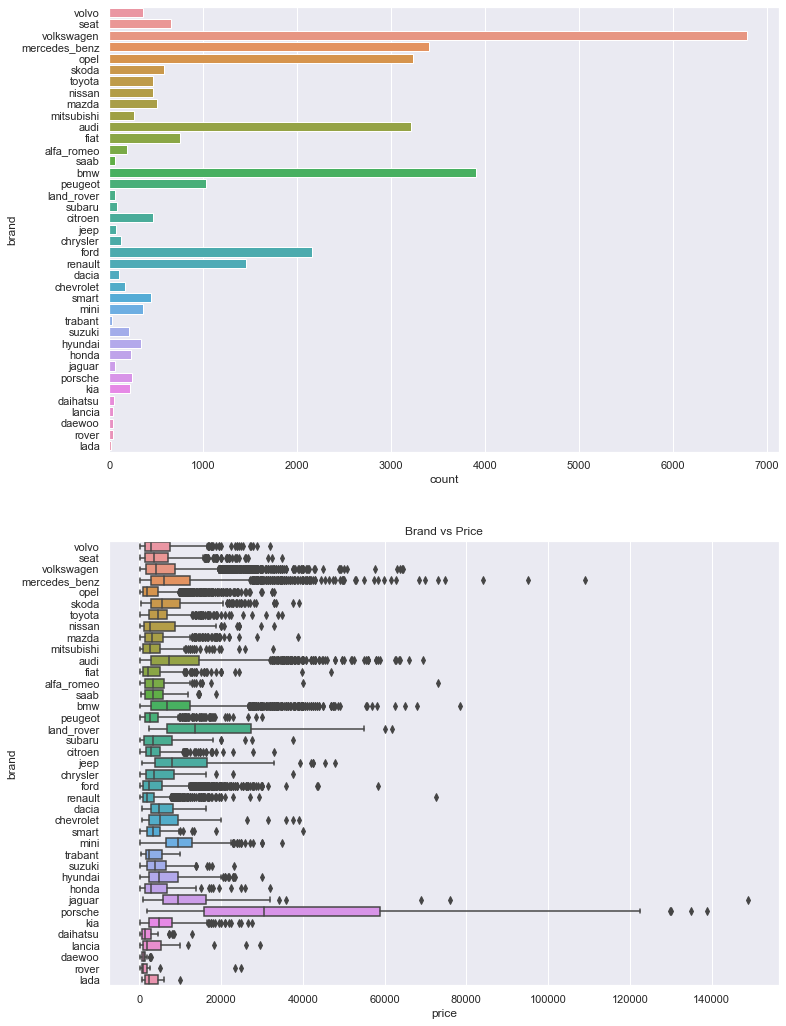

In [34]:
# Brand
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(12,18))

sns.countplot(y="brand", data=cars1, ax=axis1)
sns.boxplot(x="price", y="brand", data=cars1, ax=axis2)
axis2.set_title("Brand vs Price")
#affecting the price

 ## CORRELATION

In [35]:
cars_select = cars.select_dtypes(exclude=[object])
corelation = cars_select.corr()
round(corelation, 3)
cars_select.corr().loc[:, "price"].abs().sort_values(ascending=False)[1:]
# powerPS have some decent affect on the price i.e 58%

powerPS     0.581
kilometer   0.460
Age         0.453
Name: price, dtype: float64

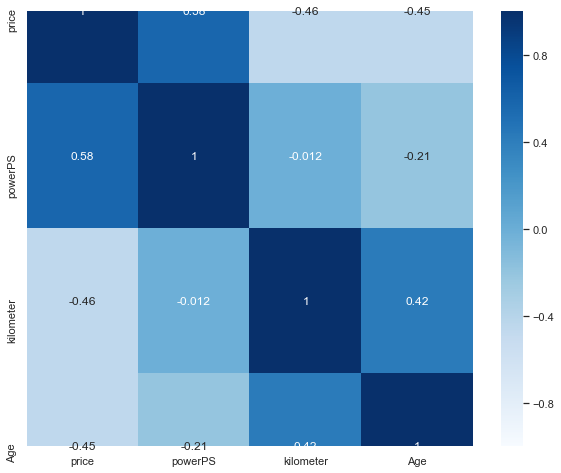

In [36]:
sns.heatmap(corelation, vmin = -1, vmax = 1, annot = True, cmap="Blues")
plt.show()

In [37]:
cars1.describe()

,price,powerPS,kilometer,Age
count,32884.000,32884.000,32884.000,32884.000
mean,6782.165,129.121,124043.760,15.020
std,8288.544,60.749,39714.394,6.279
min,100.000,10.000,5000.000,0.420
25%,1690.000,86.000,100000.000,10.500
50%,3999.000,116.000,150000.000,14.670
75%,8800.000,156.000,150000.000,18.920
max,149000.000,500.000,150000.000,67.500


In [38]:
cars2 = cars1.copy()
#converting categorical variable in 0/1 format or dummy format
cars2 = pd.get_dummies(cars1, drop_first=True)
cars2.head()

,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,163,150000,13.500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4500,86,60000,13.000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,18750,185,150000,10.920,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,988,90,150000,23.170,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1399,136,150000,21.920,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building ML Model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Seprating the values for Linear Regression Model

In [40]:
x1 = cars2.drop(["price"], axis = "columns", inplace = False )
y1 = cars2["price"]

### Plotting  the variable price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A4EAB5C48>,
      dtype=object)

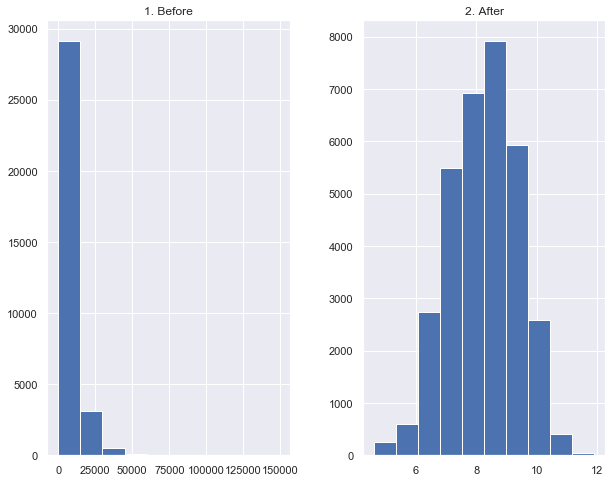

In [41]:
prices = pd.DataFrame({"1. Before": y1, "2. After":np.log(y1)})
prices.hist()

#### Transforming file as a loarithmic value

In [56]:
y1 = np.log(y1)
y1

1       2.251
3       2.130
4       2.286
5       1.931
7       1.980
         ... 
49991   2.230
49992   1.898
49993   1.905
49995   2.046
50000   1.946
Name: price, Length: 32884, dtype: float64

In [64]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state=0)

In [58]:
#Findin mean value on test data
test_mean = np.mean(y_test)
print(test_mean)
test_mean = np.repeat(test_mean, len(y_test))
print(test_mean)

2.1001740322450613
[2.10017403 2.10017403 2.10017403 ... 2.10017403 2.10017403 2.10017403]


Root mean squared value error (RMSE)

In [59]:
rmse = np.sqrt(mean_squared_error(y_test, test_mean))
print(rmse)

0.1425618054468809


### Initialinzing the Model

In [65]:
linear_reg = LinearRegression(fit_intercept = True)

In [66]:
model_fit = linear_reg.fit(x_train, y_train)

In [75]:
cars_prediction = linear_reg.predict(x_test)
cars_prediction

array([2.1360753 , 1.98292739, 1.95938321, ..., 2.09404147, 2.03115819,
       2.13482495])

In [94]:
len(x_test) == len(y_test)

True

SE and RMSE for predictive values

In [76]:
mse1 = mean_squared_error(y_test, cars_prediction)
rmse1 = np.sqrt(mse1)
print(mse1)
print(rmse1)

0.005328061927097213
0.07299357456034888


 R SQUARED VALUE

In [77]:
r2_test = model_fit.score(x_test, y_test)
r2_train = model_fit.score(x_train, y_train)

In [78]:
print(r2_test, r2_train)

0.7378421356848721 0.7496864823142038


Regression Diaagnostic - Residual plot analysis

count   9866.000
mean       0.000
std        0.073
min       -0.683
25%       -0.030
50%        0.006
75%        0.038
max        0.594
Name: price, dtype: float64

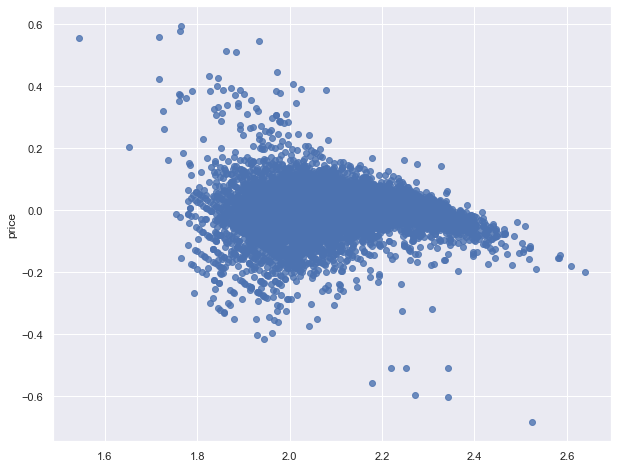

In [79]:
reiduals = y_test - cars_prediction
sns.regplot(x=cars_prediction, y=reiduals, fit_reg=False, scatter=True)
reiduals.describe()

## RANDOM FOREST MODEL

In [80]:
rf = RandomForestRegressor(n_estimators=100, max_features="auto",
                           max_depth=100, min_samples_split=10,
                           min_samples_leaf=4, random_state=1)

In [81]:
model_rf = rf.fit(x_train, y_train)

In [82]:
rf_prediction = rf.predict(x_test)

SE and RMSE for predictive values

In [89]:
mse1 = mean_squared_error(y_test, rf_prediction)
rmse1 = np.sqrt(mse1)
print(mse1)
print(rmse1)

0.0033968933635760657
0.05828287367294157


 R SQUARED VALUE

In [90]:
r2_test = model_rf.score(x_test, y_test)
r2_train = model_rf.score(x_train, y_train)

In [91]:
print(r2_test, r2_train)

0.8328618695341442 0.9067039762825692


END